<a href="https://colab.research.google.com/github/marycx/ECE324-Project-Emoji-Predictor/blob/main/upload_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import torch
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import math

In [ ]:
!pip install pandas

# Install langid
!pip install langid

# Install spacy
!pip install spacy

# Download the English language model in spacy
!python -m spacy download en_core_web_sm

# Install emoji
!pip install emoji==1.7

In [ ]:
import pandas as pd # read csv
import emoji # find emoji
import langid # remove non-English text
import re # remove url etc.
import spacy # lemmatization
import html

In [ ]:
torch.manual_seed(42)
np.random.seed(42)
torch.random.manual_seed(42)

# Import data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving emoji_to_number_ref_50 to emoji_to_number_ref_50


In [ ]:
# Open file 
import csv
l = []
with open('emoji_to_number_ref_50') as file_obj:
      
    heading = next(file_obj)
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        l.append(row)

In [ ]:
l[:20]

In [ ]:
import csv
r = []
with open('emoji_to_number_ref (1)') as file_obj:
      
    heading = next(file_obj)
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        r.append(row)

In [ ]:
r[1]

['2', '👎🏼']

# Train, Validation, Test

## Word Encoding

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_preproc_csv(2) to data_preproc_csv(2)


In [ ]:
# Open file 
import csv
w = []
with open('data_preproc_csv_50(1)') as file_obj:
      
    heading = next(file_obj)
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        w.append(row)

In [ ]:
w[1]

['KatyCats, get ready to own a piece of my history! FINALLY the Nostalgia Store powered by @Theta_Network is coming Friday 3/24, featuring REAL stage-worn cutie costumes &amp; props from some of my past performances! A thread of some of the lewks here :',
 '2']

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')
 
import gensim
from gensim.models import Word2Vec

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sample = open("data_preproc_csv(2)")
s = sample.read()

In [ ]:
s

In [ ]:
data = []
for i in sent_tokenize(s):
    temp = []
     
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
 
    data.append(temp)

In [ ]:
data

In [ ]:
model1 = gensim.models.Word2Vec(data, min_count = 1,vector_size = 1000, window = 5)

In [ ]:
w1 = "sad"
model1.wv.most_similar(positive=w1)

[('nice', 0.9375548958778381),
 ('cute', 0.9356327056884766),
 ('fail', 0.9356213808059692),
 ('respond', 0.9297271966934204),
 ('junior', 0.9291984438896179),
 ('often', 0.9290633201599121),
 ('cry', 0.9289397597312927),
 ('hate', 0.9261022806167603),
 (',37', 0.9255183935165405),
 ('dude', 0.9227755069732666)]

In [ ]:
model1.wv["request"]

## Data

In [ ]:
l[0]

['comment below if u tend to agree with I and not', '1']

In [ ]:
r[0]

['1', '🤮']

In [ ]:
len(l)

30010

In [ ]:
train_data_encoding = []
labels_number = []

for (x,y) in w:
  word_encode = []
  for word in x:
    try:
      encode = model1.wv[word]
      word_encode.append(encode)
    except KeyError:
      pass
  if len(word_encode) != 0:
    # word_encode = torch.Tensor(word_encode)
    train_data_encoding.append(word_encode)
    labels_number.append(int(y))


In [ ]:
train_data_encoding[1]

In [ ]:
x_data = []
for i in train_data_encoding:
  add = np.mean(i, axis = 0)
  x_data.append(add)

In [ ]:
x_data[3].shape

(50,)

In [ ]:
len(set(labels_number))

50

In [ ]:
set_labels_number = set(labels_number)

num_occurence_emoji = []

for i in set_labels_number:
  num_occurence_emoji.append(labels_number.count(i))

In [ ]:
sum((sorted(num_occurence_emoji)[-51:]))

16177

In [ ]:
most_frequent_emoji50 = []
set_labels_number = list(set_labels_number)

for j in range(len(num_occurence_emoji)):
    if num_occurence_emoji[j] >= 140:
      most_frequent_emoji50.append(set_labels_number[j])

In [ ]:
len(most_frequent_emoji50)

51

In [ ]:
new_x_data = []
new_labels = []

for i in range(len(labels_number)):
  if labels_number[i] in most_frequent_emoji50:
    new_x_data.append(x_data[i])
    new_labels.append(int(labels_number[i]))

In [ ]:
len(new_x_data)

16177

In [ ]:
new_labels.count(39)

984

In [ ]:
y_set = sorted((set(new_labels)))

In [ ]:
y_set[10]

39

In [ ]:
emoji_set = []
for i in y_set:
  emoji_set.append(r[i])

In [ ]:
emoji_set

In [ ]:
for number, i in enumerate(y_set):
  for j in range(len(new_labels)):
    if new_labels[j] == i:
        new_labels[j] = number

In [ ]:
new_labels.count(10)

984

In [ ]:
test_size = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(x_data, labels_number, test_size=test_size)

# To create a validation set, we first concate the original splitted dataset into a single dataset 
# then randomly shuffle the images and labels in the same way (seed = 1)
X_data = np.concatenate([X_train, X_test], axis = 0)
Y_data = np.concatenate([Y_train, Y_test], axis = 0)

N = np.arange(len(X_data))
np.random.shuffle(N)
X_data = X_data[N]
Y_data = Y_data[N]

# Next, we partition the randomly shuffled dataset into training, validation and testset according a ratio
train_ratio = 0.80
valid_ratio = 0.10
n_train = int(len(X_data) * train_ratio)
n_valid = int(len(X_data) * valid_ratio)

X_train, X_valid, X_test = X_data[:n_train], X_data[n_train:n_train+n_valid], X_data[n_train+n_valid:]
Y_train, Y_valid, Y_test = Y_data[:n_train], Y_data[n_train:n_train+n_valid], Y_data[n_train+n_valid:]

In [ ]:
max(set(Y_train))

# Model (2 layers)

In [ ]:
class Emoji_Predictor(torch.nn.Module):
    def __init__(self, input):
        super(Emoji_Predictor, self).__init__()
        self.input = input
        self.fc1 = torch.nn.Linear(self.input, 128)  # input layer: 3 word embeddings concatenated
        self.fc2 = torch.nn.Linear(128, 64)  # hidden layer
        # self.fc2_2 = torch.nn.Linear(256, 128) 
        self.fc3 = torch.nn.Linear(64, 51)  # output layer
        self.dropout = torch.nn.Dropout(0.2)

    def forward(self, x):
        
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.nn.functional.relu(self.fc2(x))
        # x = self.dropout(x)
        # x = torch.nn.functional.relu(self.fc2_2(x))
        x = self.fc3(x)
        return x

In [ ]:
input = 1000

In [ ]:
model = Emoji_Predictor(input)

In [ ]:
epochs = 1800
learning_rate = 0.00005

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# cross entropy loss
criterion = torch.nn.CrossEntropyLoss()

## Training

In [ ]:
X_train, X_valid, X_test = torch.Tensor(X_train), torch.Tensor(X_valid), torch.Tensor(X_test)
Y_train, Y_valid, Y_test = torch.Tensor(Y_train), torch.Tensor(Y_valid), torch.Tensor(Y_test)

In [ ]:
Y_train = Y_train.type(torch.long)

In [ ]:
Y_valid = Y_valid.type(torch.long)

In [ ]:
Loss = []
iter = 0
losses_test_1emoji = []
losses_test_3emoji = []
accuracy_1emo = []
accuracy_3mo = []
accuracy_train = []

Iterations = []
output = None

for epoch in range(epochs):

  x = X_train
  
  outputs = model(x)

  optimizer.zero_grad()
 
  loss = criterion(outputs, Y_train)

  loss.backward()
  optimizer.step() 
  

  iter+=1
  if iter%100==0:
      with torch.no_grad():
          # Calculating the loss and accuracy for the valid dataset - 1 emoji
          correct_test = 0
          total_test = 0
          correct_test_3emo = 0

          outputs_test = torch.squeeze(model(X_valid))
          loss_test = criterion(outputs_test, Y_valid)
          
          predicted_test = outputs_test.round().detach().numpy()
          total_test += Y_valid.size(0)

          # 1 emoji
          correct_test += np.sum(predicted_test.argmax(axis=1) == Y_valid.detach().numpy())
          accuracy_test = 100 * correct_test/total_test
          losses_test_1emoji.append(loss_test.item())
          accuracy_1emo.append(accuracy_test)

          # 3 emoji
          topk_values, topk_indices = torch.topk(outputs_test, k=3, dim=1)
          num_columns = topk_indices.shape[1]
          for i in range(num_columns):
            column = topk_indices[:, i]
            correct_test_3emo += torch.sum(column == Y_valid)
          accuracy_test_3mo = 100 * correct_test_3emo/total_test
          losses_test_3emoji.append(loss_test.item())
          accuracy_3mo.append(accuracy_test_3mo)
          
          # Calculating the loss and accuracy for the train dataset
          total = 0
          correct = 0
          total += Y_train.size(0)
          correct += np.sum(torch.squeeze(outputs).round().detach().numpy().argmax(axis=1) == Y_train.detach().numpy())
          accuracy = 100 * correct/total
          Loss.append(loss.item())
          Iterations.append(iter)
          accuracy_train.append(accuracy)
          
          print(f"Iteration: {iter}. \nValid_1emoji - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
          print(f"Valid_3emoji -  Loss: {loss.item()}. Accuracy: {accuracy_test_3mo}\n")
          print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")
          


Iteration: 100. 
Valid_1emoji - Loss: 3.8460958003997803. Accuracy: 8.338480543545398
Valid_3emoji -  Loss: 3.8387610912323. Accuracy: 21.556516647338867

Train -  Loss: 3.8387610912323. Accuracy: 8.40342619029246

Iteration: 200. 
Valid_1emoji - Loss: 3.7052581310272217. Accuracy: 10.809141445336628
Valid_3emoji -  Loss: 3.6778743267059326. Accuracy: 24.64484214782715

Train -  Loss: 3.6778743267059326. Accuracy: 11.227718188131801

Iteration: 300. 
Valid_1emoji - Loss: 3.679222345352173. Accuracy: 11.05620753551575
Valid_3emoji -  Loss: 3.650430917739868. Accuracy: 24.70660972595215

Train -  Loss: 3.650430917739868. Accuracy: 12.470098001388996

Iteration: 400. 
Valid_1emoji - Loss: 3.6734821796417236. Accuracy: 10.870907967881408
Valid_3emoji -  Loss: 3.6456425189971924. Accuracy: 24.70660972595215

Train -  Loss: 3.6456425189971924. Accuracy: 12.547264449417394

Iteration: 500. 
Valid_1emoji - Loss: 3.6705048084259033. Accuracy: 11.11797405806053
Valid_3emoji -  Loss: 3.6432197093

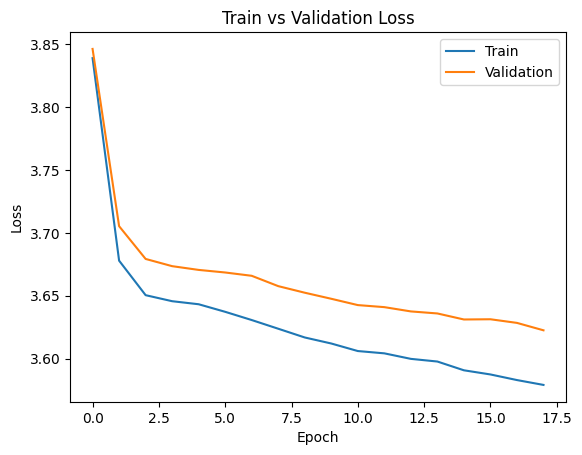

In [ ]:
import matplotlib.pyplot as plt

plt.title("Train vs Validation Loss")
plt.plot(Loss, label="Train")
plt.plot(losses_test_1emoji, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

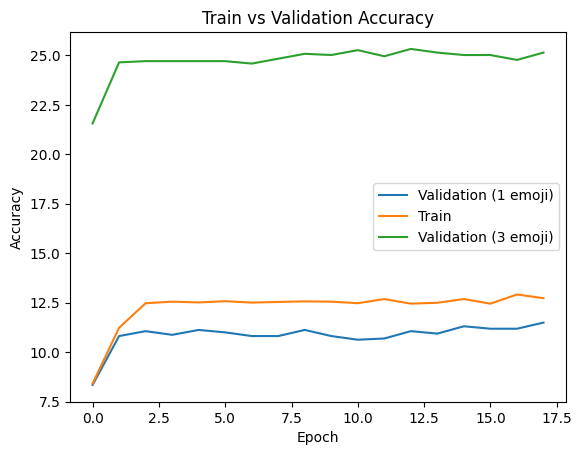

In [ ]:
import matplotlib.pyplot as plt

plt.title("Train vs Validation Accuracy")
plt.plot(accuracy_1emo, label="Validation (1 emoji)")
plt.plot(accuracy_train, label="Train")
plt.plot(accuracy_3mo, label="Validation (3 emoji)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

In [ ]:
Y_test = Y_test.type(torch.long)

In [ ]:
Loss = []
iter = 0
losses_test = []
losses_test_3emoji = []
output = None

correct_test = 0
total_test = 0
correct_test_3emo = 0

outputs_test = torch.squeeze(model(X_test))
loss_test = criterion(outputs_test, Y_test)
          
predicted_test = outputs_test.round().detach().numpy()
total_test += Y_test.size(0)
correct_test += np.sum(predicted_test.argmax(axis=1) == Y_test.detach().numpy())
accuracy_test = 100 * correct_test/total_test
losses_test.append(loss_test.item())
          
# 3 emoji
topk_values, topk_indices = torch.topk(outputs_test, k=3, dim=1)
num_columns = topk_indices.shape[1]
for i in range(num_columns):
  column = topk_indices[:, i]
  correct_test_3emo += torch.sum(column == Y_test)

accuracy_test_3mo = 100 * correct_test_3emo/total_test
losses_test_3emoji.append(loss_test.item())
          
          
print(f"Test_1emoji - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")  
print(f"Test_3emoji - Loss: {loss_test.item()}. Accuracy: {accuracy_test_3mo}")    

Test_1emoji - Loss: 3.630661725997925. Accuracy: 11.597779148673657
Test_3emoji - Loss: 3.630661725997925. Accuracy: 24.737815856933594


In [ ]:
topk_values, topk_indices = torch.topk(outputs_test, k=3, dim=1)
num_columns = topk_indices.shape[1]
for i in range(num_columns):
  column = topk_indices[:, i]
  correct_test_3emo += torch.sum(column == Y_test)

In [ ]:
print(l[9],l[11],l[15],l[17])

['10', '🔥'] ['12', '❤️'] ['16', '🙏'] ['18', '😂']


In [ ]:
topk_indices[201:206]

tensor([[12, 16, 18],
        [12, 18, 10],
        [12, 10, 18],
        [12, 18, 16],
        [12, 10, 18]])

In [ ]:
Y_test[201:206]

tensor([24,  2, 10, 18, 12])